In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

1. drinks.csv 파일 로드 
2. 'beer_serving', 'spirit_serving', 'wine_serving', 'total_litres_of_pure_alcohol' 컬럼의 데이터 간의 상관관계 출력
3. 행렬 히트맵 시각화
4. 국가별 술 소비량 대비 알콜 비율 컬럼 추가 
5. 국가별 순위 시각화 (우리나라의 소비량을 표시)

In [ ]:
# 1. 파일 로드 
drinks = pd.read_csv("../csv/drinks.csv")
drinks.head(2)

In [ ]:
## 상관계수 행렬 출력
corr = drinks[
    ['beer_servings', 
     'spirit_servings', 
     'wine_servings', 
     'total_litres_of_pure_alcohol']
].corr(method='pearson')
corr

In [ ]:
## 상관관계 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

sns.set(font_scale = 1.5)

hm = sns.heatmap(
    corr.values, 
    cbar=True, 
    annot = True, 
    square= True, 
    fmt = '.2f', 
    annot_kws = {'size' : 20}, 
    xticklabels = cols_view, 
    yticklabels = cols_view
)

plt.tight_layout()
plt.show()

In [ ]:
sns.set(style='whitegrid', context='notebook')

sns.pairplot(
    drinks[
        ['beer_servings', 
         'spirit_servings', 
         'wine_servings', 
         'total_litres_of_pure_alcohol']
    ], 
    height=2.5
)
plt.show()

In [18]:
## 새로운 파생변수를 생성
## 총 술의 소비량(total_servings) = beer + spirit + wine
drinks['total_servings'] = drinks['beer_servings'] + \
    drinks['spirit_servings'] + drinks['wine_servings']


In [19]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275


In [21]:

## 술 소비량 대비 알콜 비율 파생변수 생성
## alcohol_rate = total_litres_of_pure_alcohol / total_servings 
drinks['alcohol_rate'] = \
    drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']


In [22]:
drinks['alcohol_rate'].isna().sum()

13

In [24]:
## 결측치 존재 -> 0으로 대체
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [25]:
drinks['alcohol_rate'].isna().sum()

0

In [ ]:
### South Korea 의 alcohol_rate 순위는 어떻게 되는가?
# alcohol_rate를 기준으로 내림차순 정렬
drinks_rank = drinks.sort_values('alcohol_rate', ascending=False)
# 인덱스를 초기화
drinks_rank = drinks_rank.reset_index(drop=True)

drinks_rank.head(15)

In [35]:
# 한국의 alcohol_rate 순위
drinks_rank[drinks_rank['country'] == 'South Korea'].index + 1

Int64Index([15], dtype='int64')

In [ ]:
drinks_rank.loc[drinks_rank['country'] == 'South Korea']

In [ ]:
drinks_rank.query("country == 'South Korea'")

0.0593939393939394


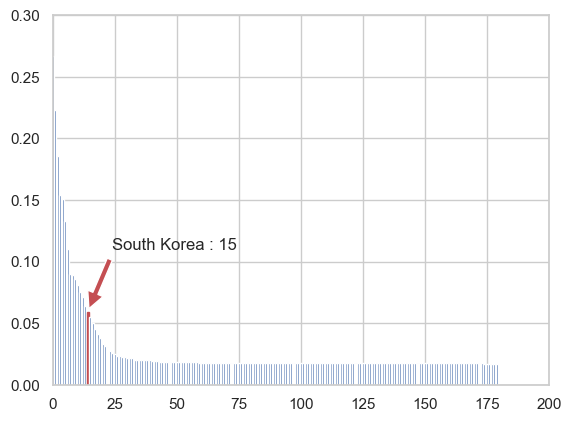

In [41]:
## 데이터의 시각화
x = drinks_rank.index
y = drinks_rank['alcohol_rate']

# 국가 리스트 
country_list = drinks_rank['country'].tolist()

bar_list = plt.bar(x, y)

# 그래프 커스텀
# 한국의 그래프만 빨간색으로 변경
bar_list[country_list.index('South Korea')].set_color('r')

# 그래프의 x축의 범위 y축의 범위 지정
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index('South Korea')
korea_alcohol_rate = drinks_rank[drinks_rank['country'] == 'South Korea']\
                    ['alcohol_rate'].values[0]
print(korea_alcohol_rate)

plt.annotate(
    'South Korea : ' + str(korea_rank + 1), 
    xy = (korea_rank, korea_alcohol_rate), 
    xytext=(korea_rank + 10, korea_alcohol_rate+0.05), 
    arrowprops= dict(
        facecolor = 'r', 
        shrink = 0.05
    )
)

plt.show()
